# Analisi dati

- Lettura database tabulati: libreria `pandas` (Riferimento e materiali: sezioni da 7 a 9 di [questa lezione](http://swcarpentry.github.io/python-novice-gapminder/) di swc).

- Fit e interpolazione di funzioni con `scipy`

## Lettura database tabulati: libreria `pandas`

In [1]:
import pandas as pd # Importiamo la liberia pandas

In [2]:
# Con questo comando leggiamo un database in formato csv e
# lo assegniamo a una variabile 'data'
data = pd.read_csv('data/gapminder_gdp_oceania.csv') 

# Questa variabile è del tipo 'datafram di pandas'
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Tutto questo è molto simile a quando abbiamo letto un file .csv con la libreria `numpy` e il metodo `numpy.loadtxt`. 

Ma allora qual è la differenza? Questa sta nel fatto che il file .csv che stiamo leggendo adesso è più complicato e non contiene solamente numeri, come possiamo vedere stampando la variabile:

In [3]:
print(data)

       country  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
0    Australia     10039.59564     10949.64959     12217.22686   
1  New Zealand     10556.57566     12247.39532     13175.67800   

   gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  \
0     14526.12465     16788.62948     18334.19751     19477.00928   
1     14463.91893     16046.03728     16233.71770     17632.41040   

   gdpPercap_1987  gdpPercap_1992  gdpPercap_1997  gdpPercap_2002  \
0     21888.88903     23424.76683     26997.93657     30687.75473   
1     19007.19129     18363.32494     21050.41377     23189.80135   

   gdpPercap_2007  
0     34435.36744  
1     25185.00911  


In [5]:
# Invece che indicizzare secondo (0,1), le colonne, 
# indicizziamo per 'country'
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
print(data)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Utilizzando jupyter, possiamo approfittare della formattazione automatica ed evitare la chiamata alla funzione `print`

In [7]:
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Australia to New Zealand
Data columns (total 12 columns):
gdpPercap_1952    2 non-null float64
gdpPercap_1957    2 non-null float64
gdpPercap_1962    2 non-null float64
gdpPercap_1967    2 non-null float64
gdpPercap_1972    2 non-null float64
gdpPercap_1977    2 non-null float64
gdpPercap_1982    2 non-null float64
gdpPercap_1987    2 non-null float64
gdpPercap_1992    2 non-null float64
gdpPercap_1997    2 non-null float64
gdpPercap_2002    2 non-null float64
gdpPercap_2007    2 non-null float64
dtypes: float64(12)
memory usage: 208.0+ bytes


In [10]:
print(data.columns)

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')


In [9]:
data.T #Trasposta di un dataframe; si può fare anche con i numpy array

country,Australia,New Zealand
gdpPercap_1952,10039.59564,10556.57566
gdpPercap_1957,10949.64959,12247.39532
gdpPercap_1962,12217.22686,13175.67800
gdpPercap_1967,14526.12465,14463.91893
gdpPercap_1972,16788.62948,16046.03728
gdpPercap_1977,18334.19751,16233.71770
gdpPercap_1982,19477.00928,17632.41040
gdpPercap_1987,21888.88903,19007.19129
gdpPercap_1992,23424.76683,18363.32494
gdpPercap_1997,26997.93657,21050.41377


In [11]:
data.describe() # Così otteniamo direttamente informazioni utili sul dataframe

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
std,365.560078,917.644806,677.727301,43.986086,525.09198,1485.263517,1304.328377,2037.668013,3578.979883,4205.533703,5301.853680,6540.991104
min,10039.595640,10949.649590,12217.226860,14463.918930,16046.03728,16233.717700,17632.410400,19007.191290,18363.324940,21050.413770,23189.801350,25185.009110
25%,10168.840645,11274.086022,12456.839645,14479.470360,16231.68533,16758.837652,18093.560120,19727.615725,19628.685413,22537.294470,25064.289695,27497.598692
50%,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
75%,10427.330655,11922.958888,12936.065215,14510.573220,16602.98143,17809.077557,19015.859560,21168.464595,22159.406358,25511.055870,28813.266385,32122.777857
max,10556.575660,12247.395320,13175.678000,14526.124650,16788.62948,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,30687.754730,34435.367440


In [13]:
data_america = pd.read_csv('data/gapminder_gdp_americas.csv')
#data_america
#data_america.head(n=3) # Primi tre elementi
data_america.tail(n=3) # Ultimi tre elementi

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
22,Americas,United States,13990.482080,14847.127120,16173.145860,19530.365570,21806.035940,24072.632130,25009.559140,29884.350410,32003.932240,35767.433030,39097.099550,42951.65309
23,Americas,Uruguay,5716.766744,6150.772969,5603.357717,5444.619620,5703.408898,6504.339663,6920.223051,7452.398969,8137.004775,9230.240708,7727.002004,10611.46299
24,Americas,Venezuela,7689.799761,9802.466526,8422.974165,9541.474188,10505.259660,13143.950950,11152.410110,9883.584648,10733.926310,10165.495180,8605.047831,11415.80569


In [10]:
# Salviamo un nuovo dataframe in formato .csv
data_america.describe().to_csv('americas_processed.csv')

In [16]:
data = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
#print(data)
#print(data.iloc[0, 0]) # Indici numerici: iloc
#data
data.loc["Italy","gdpPercap_1952"] #Labels come indici: loc

4931.404154999999

In [17]:
print(data.loc[:,"gdpPercap_1952"]) #Singola colonna

country
Albania                    1601.056136
Austria                    6137.076492
Belgium                    8343.105127
Bosnia and Herzegovina      973.533195
Bulgaria                   2444.286648
Croatia                    3119.236520
Czech Republic             6876.140250
Denmark                    9692.385245
Finland                    6424.519071
France                     7029.809327
Germany                    7144.114393
Greece                     3530.690067
Hungary                    5263.673816
Iceland                    7267.688428
Ireland                    5210.280328
Italy                      4931.404155
Montenegro                 2647.585601
Netherlands                8941.571858
Norway                    10095.421720
Poland                     4029.329699
Portugal                   3068.319867
Romania                    3144.613186
Serbia                     3581.459448
Slovak Republic            5074.659104
Slovenia                   4215.041741
Spain            

In [18]:
data.loc['Italy':'Poland', 'gdpPercap_1962':'gdpPercap_1972'] # Slicing

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
country,,,
Italy,8243.582340,10022.401310,12269.273780
Montenegro,4649.593785,5907.850937,7778.414017
Netherlands,12790.849560,15363.251360,18794.745670
Norway,13450.401510,16361.876470,18965.055510
Poland,5338.752143,6557.152776,8006.506993


In [20]:
minidata = data.loc['Italy':'Poland', 'gdpPercap_1962':'gdpPercap_1972']
print( minidata.mean(axis=1) )  # Media sulle colonne (anni)

country
Italy          10178.419143
Montenegro      6111.952913
Netherlands    15649.615530
Norway         16259.111163
Poland          6634.137304
dtype: float64


In [15]:
# Attenzione ai limiti delle 'slice':
print(data.iloc[0:2, 0:2])
print(data.loc['Albania':'Belgium', 'gdpPercap_1952':'gdpPercap_1962'])

         gdpPercap_1952  gdpPercap_1957
country                                
Albania     1601.056136     1942.284244
Austria     6137.076492     8842.598030
         gdpPercap_1952  gdpPercap_1957  gdpPercap_1962
country                                                
Albania     1601.056136     1942.284244     2312.888958
Austria     6137.076492     8842.598030    10750.721110
Belgium     8343.105127     9714.960623    10991.206760


In [16]:
# Facciamo un confronto:
# cerchiamo i valori superiori a 10000

print('Paesi ricchi:\n', minidata > 10000) #Notare '\n' per andare a capo

Paesi ricchi:
              gdpPercap_1962  gdpPercap_1967  gdpPercap_1972
country                                                    
Italy                 False            True            True
Montenegro            False           False           False
Netherlands            True            True            True
Norway                 True            True            True
Poland                False           False           False


In [21]:
# Espelliamo i valori che non rispettano la condizione precedente,
# trasformandoli in NaN ('not a number')
mask = minidata > 10000
minidata[mask]

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
country,,,
Italy,NaN,10022.40131,12269.27378
Montenegro,NaN,NaN,NaN
Netherlands,12790.84956,15363.25136,18794.74567
Norway,13450.40151,16361.87647,18965.05551
Poland,NaN,NaN,NaN


In [23]:
# I NaN sono ignorati dalle funzioni che operano sui dati come la media

minidata[mask].describe()
#print(minidata[mask].mean(axis=1) )

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
count,2.000000,3.000000,3.000000
mean,13120.625535,13915.843047,16676.358320
std,466.373656,3408.589070,3817.597015
min,12790.849560,10022.401310,12269.273780
25%,12955.737547,12692.826335,15532.009725
50%,13120.625535,15363.251360,18794.745670
75%,13285.513523,15862.563915,18879.900590
max,13450.401510,16361.876470,18965.055510


Lavoriamo sui dati cercando di separare i paesi 'ricchi' da quelli 'poveri'.

In [24]:
# Paesi sopra la media
mask_ricchi = data > data.mean()
# Somma dei valori per anno ('True'=1, 'False'=0), quindi
# stiamo sommando tutte le volte che mask_ricchi è verificata
# per ogni paese.
indice_ricchezza = mask_ricchi.aggregate('sum', axis=1) / len(data.columns)
indice_ricchezza

country
Albania                   0.000000
Austria                   1.000000
Belgium                   1.000000
Bosnia and Herzegovina    0.000000
Bulgaria                  0.000000
Croatia                   0.000000
Czech Republic            0.500000
Denmark                   1.000000
Finland                   1.000000
France                    1.000000
Germany                   1.000000
Greece                    0.333333
Hungary                   0.000000
Iceland                   1.000000
Ireland                   0.333333
Italy                     0.500000
Montenegro                0.000000
Netherlands               1.000000
Norway                    1.000000
Poland                    0.000000
Portugal                  0.000000
Romania                   0.000000
Serbia                    0.000000
Slovak Republic           0.000000
Slovenia                  0.333333
Spain                     0.333333
Sweden                    1.000000
Switzerland               1.000000
Turkey      

In [26]:
# Contributo economico per anno dei paesi con wealth_score 1,0.5,0.333,0
data.groupby(indice_ricchezza).sum()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0.000000,36916.854200,46110.918793,56850.065437,71324.848786,88569.346898,104459.358438,113553.768507,119649.599409,92380.047256,103772.937598,118590.929863,149577.357928
0.333333,16790.046878,20942.456800,25744.935321,33567.667670,45277.839976,53860.456750,59679.634020,64436.912960,67918.093220,80876.051580,102086.795210,122803.729520
0.500000,11807.544405,14505.000150,18380.449470,21421.846200,25377.727380,29056.145370,31914.712050,35517.678220,36310.666080,40723.538700,45564.308390,51403.028210
1.000000,104317.277560,127332.008735,149989.154201,178000.350040,215162.343140,241143.412730,263388.781960,296825.131210,315238.235970,346930.926170,385109.939210,427850.333420


In [30]:
# Ulteriori manipolazioni
tutti_i_continenti = pd.read_csv('data/gapminder_all.csv', index_col='country')
america = tutti_i_continenti[ tutti_i_continenti['continent'] == 'Americas']
america_no_cuba = america.drop('Cuba') # Creazione di un dataframe senza una specifica entry
#america_no_cuba
america_final = america_no_cuba.drop('continent', axis = 1)
america_final
america_final.to_csv('america_no_cuba.csv') # Salviamo il file

### Plot con `pandas` e `matplotlib`

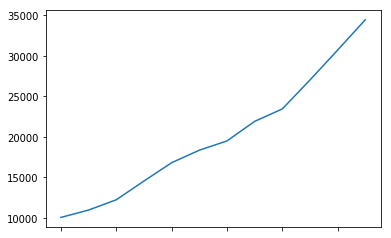

In [42]:
import pandas as pd

data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

data.loc['Australia'].plot() # Plot semplice (tutti i parametri di default)


In [43]:
print(data.columns.str)       # Leggiamo i nomi delle colonne
print(data.columns.str[0])    # Primo carattere di ogni colonna
print(data.columns.str[:])    # Stringa completa per ogni colonna
print(data.columns.str[:10])  # Primi 10 caratteri per ogni colonna (quelli che vogliamo rimuovere)
years = data.columns.str.strip('gdpPercap_') # Strip rimuove i caratteri (funziona con le stringhe)
print(years)
data.columns = years.astype(int) #Trasformiamo in interi

Index(['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g'], dtype='object')
Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')
Index(['gdpPercap_', 'gdpPercap_', 'gdpPercap_', 'gdpPercap_', 'gdpPercap_',
       'gdpPercap_', 'gdpPercap_', 'gdpPercap_', 'gdpPercap_', 'gdpPercap_',
       'gdpPercap_', 'gdpPercap_'],
      dtype='object')
Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')


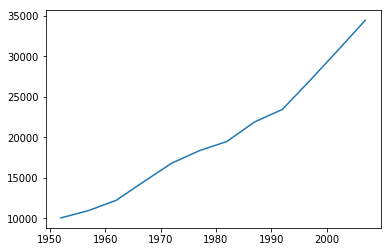

In [44]:
data.loc['Australia'].plot()

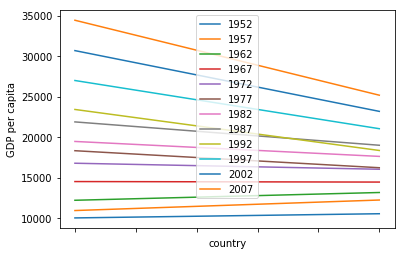

In [25]:
import matplotlib.pyplot as plt

# Questo plot è sbagliato: una curva per ogni anno
data.plot()
plt.ylabel('GDP per capita')
plt.show()

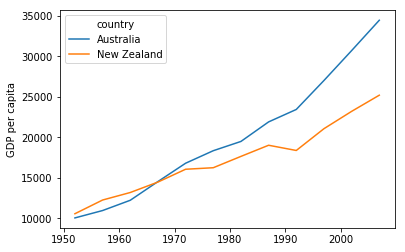

In [45]:
import matplotlib.pyplot as plt

# Dobbiamo trasporre il dataframe per ottenere il risultato corretto
data.T.plot()
plt.ylabel('GDP per capita')
plt.show()

Stili predefiniti dei plot: [qui](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) alcuni esempi dei vari _style_ disponibili.

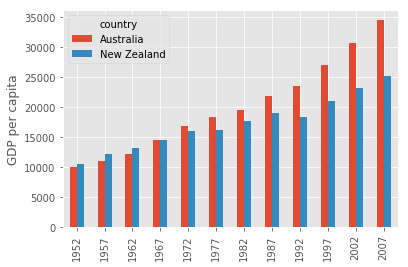

In [27]:
plt.style.use('ggplot') # Selezioniamo lo stile di un plot
data.T.plot(kind='bar') # Chiediamo a pandas di produrre un istogramma di pyplot
plt.ylabel('GDP per capita')
plt.show()

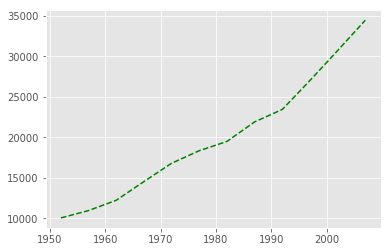

In [28]:
# Facciamo i plot direttamente con matplotlib
years = data.columns
gdp_australia = data.loc['Australia']

#plt.style.use('default') # Selezioniamo lo stile di un plot
plt.style.use('ggplot')
plt.plot(years, gdp_australia, 'g--') # Il colore ('green') è passato insieme al line style
plt.show()

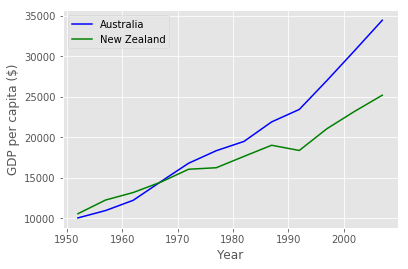

In [29]:
# Doppio plot
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']


plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Legenda
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')
plt.show()

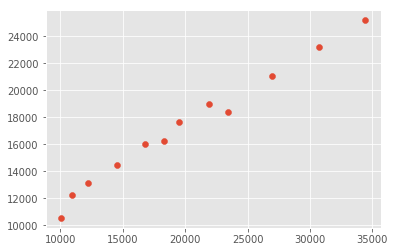

In [30]:
# Plot a dispersione per vedere eventuali correlazioni
plt.scatter(gdp_australia, gdp_nz)
plt.show()

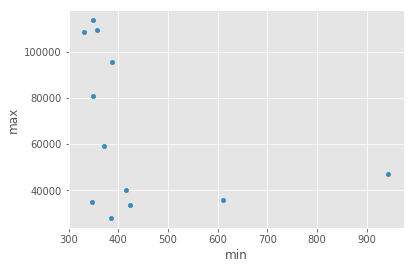

In [31]:
# Correliamo massimo e minimo dei PIL asiatici:
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')

# Utilizziamo il plot interno di pandas
#print(data_asia.describe())
#print(data_asia.describe().T) # Trasposta

data_asia.describe().T.plot(kind='scatter', x='min', y='max')

## Fit e interpolazione con `scipy`

### Fit di una funzione

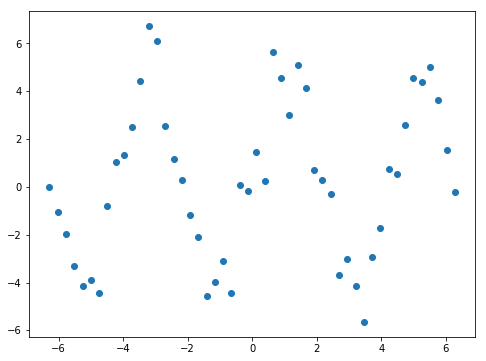

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy

# Generiamo i dati da fittare
x = np.linspace(-2*np.pi,2*np.pi,50) # asse x
a,b = [4.5, 3./2.] # parametri della funzione
y = a*np.sin(b*x)+np.random.normal(size=50) # funzione: seno + rumore gaussiano

# Plot
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('default')
ax.scatter(x,y)
plt.show()

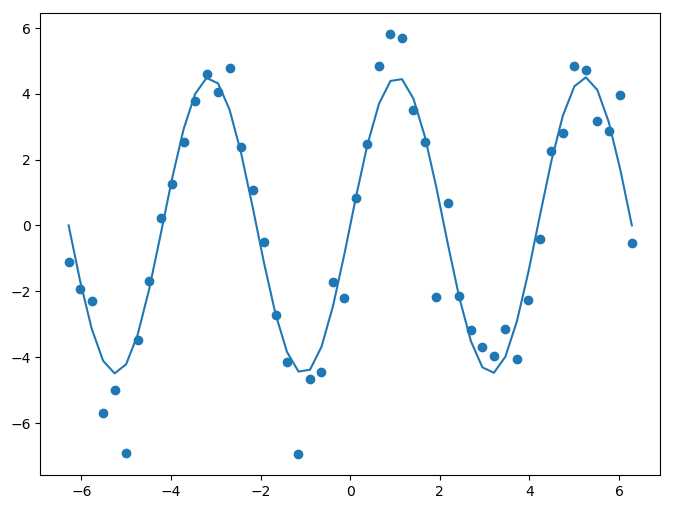

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy

# Costruiamo la funzione di test
def test_function(x,a,b):
    """
    Funzione di test per il fit
    """
    return a * np.sin( b * x )

# Generiamo i dati da fittare
x = np.linspace(-2*np.pi,2*np.pi,50) # asse x
a,b = [4.5, 3./2.] # parametri della funzione
y = a*np.sin(b*x)+np.random.normal(size=50) # funzione: seno + rumore gaussiano

# Plot
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('default')
ax.scatter(x,y)
ax.plot(x,test_function(x,a,b))
plt.show()

Parametri fittati: [4.46026639 1.48684356]
Parametri esatti:  [4.5, 1.5]


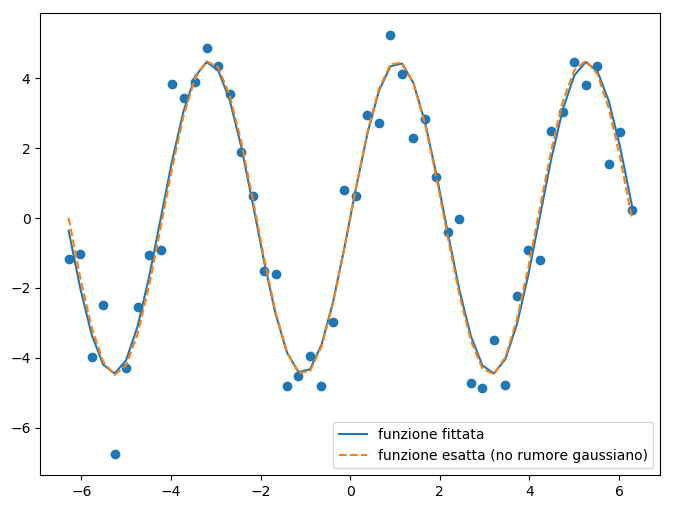

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Costruiamo la funzione di test
def test_function(x,a,b):
    """
    Funzione di test per il fit
    """
    return a * np.sin( b * x )

# Generiamo i dati da fittare
x = np.linspace(-2*np.pi,2*np.pi,50) # asse x
a,b = [4.5, 3./2.] # parametri della funzione
y = a*np.sin(b*x)+np.random.normal(size=50) # funzione: seno + rumore gaussiano

# Come si fa il fit?
#print(scipy.optimize.curve_fit.__doc__) 

# Facciamo il fit #
params, params_covariance = scipy.optimize.curve_fit(test_function, x, y)
print('Parametri fittati:',params)
print('Parametri esatti: ',[a,b])
###################

# Infine facciamo il plot
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('default')

ax.scatter(x,y)
ax.plot(x,test_function(x,params[0],params[1]),'-',label='funzione fittata')
ax.plot(x,test_function(x,a,b),'--',label='funzione esatta (no rumore gaussiano)')
plt.legend()
plt.show()

### Interpolazione di un grafico

#### Funzione 1D

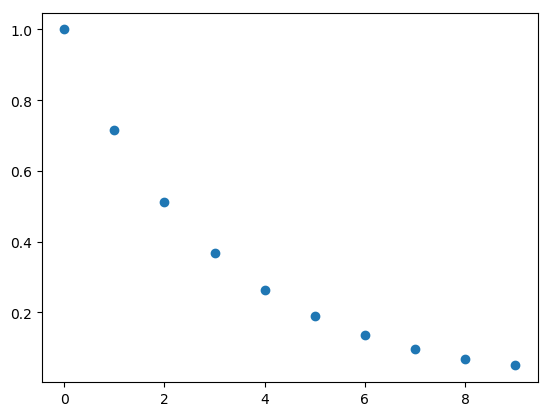

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# Generiamo i dati in una `Coarse grid` (CG):
x = np.arange(0, 10, 1) # Dati asse x
y = np.exp(-x/3.0)      # Dati asse y: usiamo exp

# Plot
plt.plot(x, y, 'o')
plt.show()

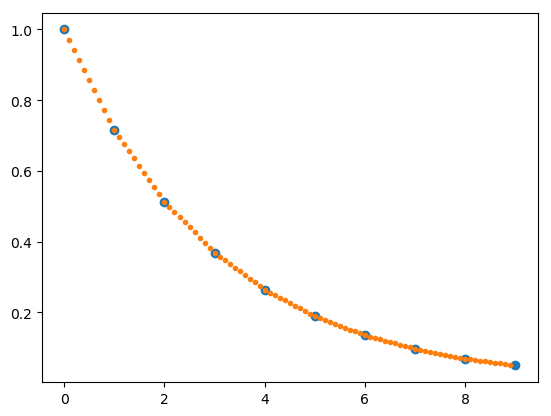

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

xmin,xmax = [0,10]

# Generiamo i dati in una `Coarse grid` (CG):
x = np.arange(xmin, xmax, 1) # Dati asse x
y = np.exp(-x/3.0)      # Dati asse y: usiamo exp

# Interpolazione: interp1d restituisce la funzione su cui valutare 
# la `Fine Grid` (FG) desiderata.
func = scipy.interpolate.interp1d(x,y)

# Fine Grid
x_densi  = np.arange(0,9,0.1)
# Utilizziamo la funzione ottenuta con l'interpolazione
y_interp = func(x_densi)

# Plot
plt.plot(x, y, 'o')
plt.plot(x_densi,y_interp,'.')
#plt.plot(x_densi,y_interp,'-')
plt.show()

#### Funzione 2D
Consideriamo una 'Coarse Grid' di punti random e due funzioni da interpolare:
1. Paraboloide: 

$z=g(x,y)=x^2+y^2$

2. Funzione trigonometrica:

$z = f(x,y) = 5(1-T(x,y))+T(x,y)$ con

$T(x,y) = l(x,y)+\frac{1}{5}l(x,y)(1-l(x,y)\sin(6\phi(x,y)$,

$l(x,y)=\sqrt{x^2+y^2}$,

$\phi(x,y) = \mathrm{atan}{\frac{y}{x}} $.

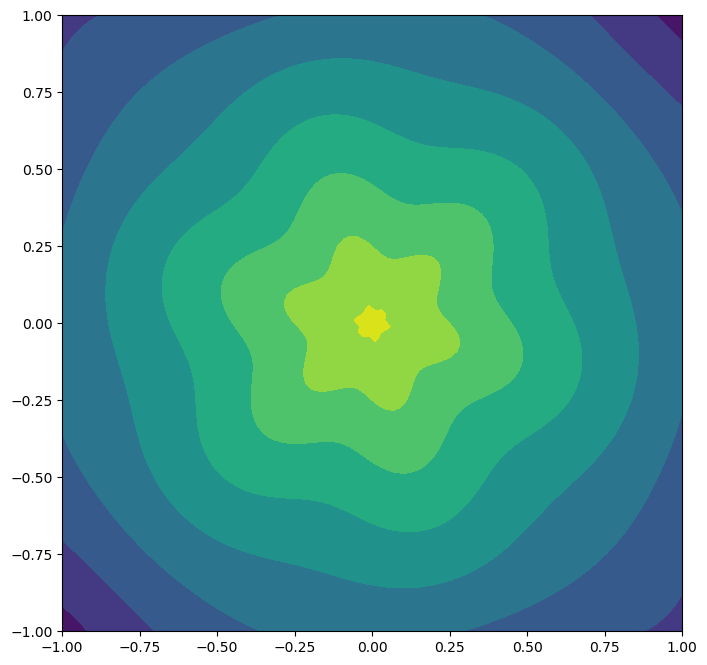

In [54]:
import numpy as np
from scipy.interpolate import griddata # griddata è la funzione che ci serve per interpolare su una griglia
import matplotlib.pyplot as plt

def circle(x, y):
    """Costruzione funzione a due variabili: paraboloide
    """
    ipot_xy = np.hypot(x,y)
    phi_xy  = np.arctan2(y,x)
    return ipot_xy**2.#*np.sin(phi_xy)

def f(x, y):
    """Costruzione funzione a due variabili: fz. trigonometrica
    """
    l = np.hypot(x, y) # Ipotenusa del tr. rett. con x,y cateti
    phi = np.arctan2(y, x) # Arcotangente per ottenere l'angolo come funzione dei 'cateti'
    T = l + l*(1-l)/5 * np.sin(6*phi) 
    return 5*(1-T) + T # Funzione finale

# Generiamo una griglia 2D di punti
x = np.linspace(-1,1,100) # Array lineari
y =  np.linspace(-1,1,100)
xx, yy = np.meshgrid(x,y) # Mesh 2D

# Calcoliamo i valori di z
z_circle = circle(xx, yy) 
z_f      = f(xx, yy)

# Plot
fig, ax = plt.subplots(figsize=(8,8))
# Plottiamo la nostra funzione sulla griglia
ax.contourf(xx, yy, z_f)  # Nuovo tipo di plot: 'contourf' per fare un contour plot
plt.show()

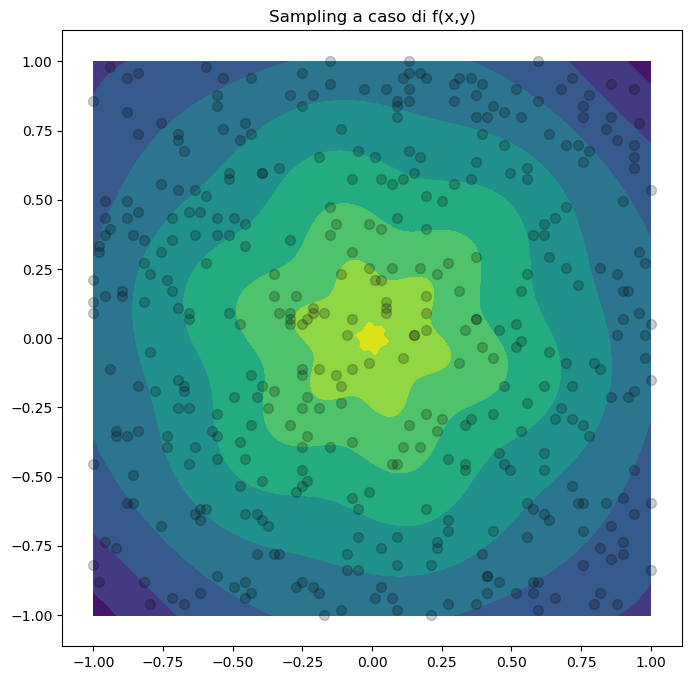

In [57]:
# Scegliamo N punti a caso sulla griglia (x,y).
# Infatti vogliamo interpolare una griglia random.
# (x,y) è la nostra Fine Grid, mentre (px,py) la nostra Coarse Grid.
N = 400
px, py = np.random.choice(x, N), np.random.choice(y, N)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
# Plottiamo la griglia random da cui partiremo per l'interpolazione insieme al risultato 'esatto'
ax.contourf(xx, yy, z_f) # Plot precedente (funzione valutata sulla FG)
ax.scatter(px, py, c='k', s=200, alpha=0.2, marker='.') # Scatterplot dei punti della CG
ax.set_title('Sampling a caso di f(x,y)')

plt.show()

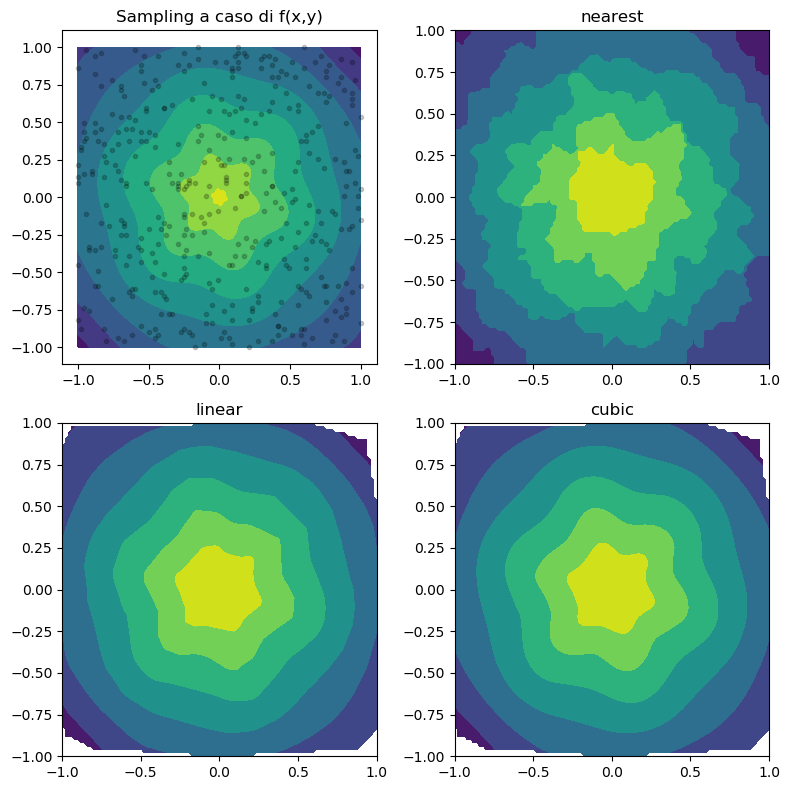

In [59]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8)) # Definiamo una griglia 2x2 di subplots

# Plottiamo la griglia random da cui partiremo per l'interpolazione insieme al risultato 'esatto'
# ax adesso è una lista 2D [[plot_00,plot_01],[plot_10,plot_11]] , [0,0] significa in alto a sinistra.
ax[0,0].contourf(xx, yy, z_f)
ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sampling a caso di f(x,y)')

# Interpoliamo provando tre diversi algoritmi a disposizione di scipy
metodi = ['nearest','linear','cubic']
for i, metodo in enumerate(metodi):
    z_interp = griddata((px, py), f(px,py), (xx, yy), method=metodo) # FUNZIONE PER INTERPOLARE!
    r = (i+1) // 2   # Indice plot di riga: '//' è divisione intera arrotondata per difeto
    c =  (i+1) % 2 # Indice plot di colonna: '%' è resto della divisione
    ax[r,c].contourf(xx, yy, z_interp)  # Contour plot della funzione interpolata
    ax[r,c].set_title(metodo)

# Provate ad aumentare il numero di punti nella Coarse Grid per ottenere interpolazioni più accurate!
plt.tight_layout()
plt.show()